# Mehrunisa Qayyum @pitaconsumer | Capstone 4 Project: NLP | Mentor: Tiago Fassoni

## What is the problem you are attempting to solve?
I intend to make a business case for flagging toxic content by addressing the problem of political ad toxicity and veracity by offering a way to sort fake political message ads within the popular social media platform: Facebook.  

## How is your solution valuable?
The New York Times held a contest to identify ways to detect ‘fake news’. Recently, Twitter introduced a tool to flag tweets’ veracity and offer resources to learn more about possible misinformation within the tweet. Similarly, Reddit addressed this problem of racist tweets in a political context by identifying Pro-Trump groups inciting racism. Facebook is facing a similar challenge and identifying ways to flag without losing political ad revenue.
Source The Atlantic: https://www.theatlantic.com/technology/archive/2018/03/largest-study-ever-fake-news-mit-twitter/555104/

“False information online is often really novel and frequently negative,” said Nyhan, the Dartmouth professor. “We know those are two features of information generally that grab our attention as human beings and that cause us to want to share that information with others—we’re attentive to novel threats and especially attentive to negative threats.”

“It’s all too easy to create both when you’re not bound by the limitations of reality. So people can exploit the interaction of human psychology and the design of these networks in powerful ways,” he added.

He lauded Twitter for making its data available to researchers and called on other major platforms, like Facebook, to do the same. “In terms of research, the platforms are the whole ballgame. We have so much to learn but we’re so constrained in what we can study without platform partnership and collaboration,” he said.

“These companies now exercise a great deal of power and influence over the news that people get in our democracy. The amount of power that platforms now hold means they have to face a great deal of scrutiny and transparency,” he said. “We can study Twitter all day, but only about 12 percent of Americans are on it. It’s important for journalists and academics, but it’s not how most people get their news.”

In a statement, Twitter said that it was hoping to expand its work with outside experts.
In a series of tweets last week, Jack Dorsey, the company’s CEO, said the company hoped to “increase the collective health, openness, and civility of public conversation, and to hold ourselves publicly accountable toward progress.”

Facebook did not respond to a request for comment.

But Tromble, the political-science professor, said that the findings would likely apply to Facebook, too. “Earlier this year, Facebook announced that it would restructure its News Feed to favor ‘meaningful interaction,’” she told me.

“It became clear that they would gauge ‘meaningful interaction’ based on the number of comments and replies to comments a post receives. But, as this study shows, that only further incentivizes creating posts full of disinformation and other content likely to garner strong emotional reactions,” she added.

“Putting my conservative scientist hat on, I’m not comfortable saying how this applies to other social networks. We only studied Twitter here,” said Aral, one of the researchers. “But my intuition is that these findings are broadly applicable to social-media platforms in general. You could run this exact same study if you worked with Facebook’s data.”

## What is your data source and how will you access it?
I will need to utilize two data sources to review both platforms. My data sources come from the Kaggle database. The first set, which will serve as our training set, is the Fake-True News compiled for the New York Times challenge. The second data set, which will serve as our test set, comes from the Facebook Political Ad data set compiled by The House Intelligence Committee  released some of these Facebook Ads as a public dataset: https://democrats-intelligence.house.gov/social-media-content/. The ads come from Propublica users whose browsers collected Facebook ads and sent to servers. The creators of the fake news ads largely came from The Internet Research Agency (IRA), which is a notorious Russian “troll” farm that has the strategic goal of sowing discord in the U.S. political system. IRA activity on Facebook includes purchasing at least 3,393 advertisements and targeting them towards 11.4 million Americans.
 
## Methodology:
Step 3: Data Cleaning/Munging Replaced null Special character handling Structuring news content Transformed Real News data from file level to original fake news format. Encoding Step 4: Exploratory Data Analysis Identify unique roots, "lemmas", through Lemmatization Develop worldclouds on Fake-True

Step 5: Contrast wordlcloud in "fake_df" with wordcloud in "true_df". Step 6: Identify lemmas through

Apply both classifiers over FB dataset.

## What techniques from the course do you anticipate using?
We will rely on Natural Language Processing techniques to conduct textual analysis. We will need to import: spaCy, NLTK, and Scikit Learn if we resort to creating pipelines to compare Facebook messages to Tweets. 

We will develop a 'Fake' versus 'True' classifier after building a Random Forest model using the Fake-True dataset as our training set. 

We will use NLTK to preprocess Facebook messages. 

Once we identify the top words through Bag of Words, we will look for correlate their use with the word “race” and related themes. Using these words from the first dataset, we will overlay the classifier on to the Facebook Ads dataset considering the words identified in Bag of Words and converted into vectors to classify what messages are likely 'fake'. 

## What do you anticipate to be the biggest challenge you’ll face?

The biggest challenges include: 1) sorting through characters, like #, as well as words borrowed from other languages; 2) recounting all race controversies to sort through message and tweet content; as well as 3) quantifying the amount of revenue lost in political ads if we focus on the racial theme. 


Problem: https://projects.propublica.org/facebook-ads/
Talos developed a model to classify 'fake' versus 'true' stories: https://blog.talosintelligence.com/2017/06/talos-fake-news-challenge.html

Question: How can Facebook detect fake political ads (those providing false information, not just exaggerated) posing as news among exaggerated political ads, which are real?
~What are the most common words in the entire dataset? ~What are the most common words in the dataset for negative and positive tweets, respectively? ~How many hashtags are there in a tweet? ~Which trends are associated with my dataset? ~Which trends are associated with either of the sentiments? Are they compatible with the sentiments?



In [1]:
!pip install wordcloud

# Part 1

In [2]:
import preprocessor
from textblob import TextBlob
import statistics
from typing import List

import pandas as pd
import numpy as np
import scipy

import spacy
import nltk
import re

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re,string,unicodedata
from nltk.stem import WordNetLemmatizer,PorterStemmer
import os
import gc
from nltk.tokenize import word_tokenize
from collections import  Counter

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [4]:
fb_likes = pd.read_csv('/Users/mehrunisaqayyum/Downloads/pseudo_facebook.csv')
fb_likes

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [5]:
#fb = pd.read_csv('/⁨Users⁩/⁨mehrunisaqayyum⁩/Downloads⁩/work/fbpac-ads-en-US.csv')

fb = pd.read_csv('/Users/mehrunisaqayyum/Downloads/work/fbpac.csv')
fb

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162319,23843108782710078,"<div class=""_5pcr userContentWrapper""><div cla...",12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-19 10:31:52.466563+00,2018-10-22 11:40:06.24382+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,"[{""entity"": ""Katko"", ""entity_type"": ""Person""}]",https://www.facebook.com/KeepThemAccountable18/,https://www.facebook.com/keepthemaccountable18/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...","HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,23843034525850259,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-24 20:41:42.111865+00,2018-10-24 20:41:42.111865+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,"[{""entity"": ""Illinois"", ""entity_type"": ""Region...",https://www.facebook.com/NRCC/,https://www.facebook.com/nrcc/,"{""<div><d

In [6]:
fb.columns

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

In [7]:
fb.dtypes

id                                 object
html                               object
political                           int64
not_political                       int64
title                              object
message                            object
thumbnail                          object
created_at                         object
updated_at                         object
lang                               object
images                             object
impressions                         int64
political_probability             float64
targeting                          object
suppressed                         object
targets                            object
advertiser                         object
entities                           object
page                               object
lower_page                         object
targetings                         object
paid_for_by                        object
targetedness                      float64
listbuilding_fundraising_proba    

In [8]:
clicks_df = pd.read_csv('/Users/mehrunisaqayyum/Downloads/datasets_104115_247225_data.csv')
clicks_df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710000,8,2.00,NaN,NaN


### Feature Description: Third Facebook Dataset

ad_id is the id of specific ad set | Numeric

Reporting_start and reporting_end are the start and end dates of the each ad | Numeric

Campaign_id is the id assigned by the ad running company | Numeric- Negligible

fb_campaign_id is the id assigned by facebook for every ad set| Numeric- Negligible

age and gender talk about the demographics | Categorical

Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were targeted for the ad | Categorical 

Impressions are the number of times the ad was shown to the users |Numeric

Clicks is the number of time users clicked on the ad | Numeric

spent is the amount of money spent on each campaign | Numeric

Totalconversions is the number of users who have clicked the ad and have made a purchase or installed an app
approved_conversions tells how many became actual active users | Numerica

In [9]:
fb['advertiser'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                 NaN
1                                                 NaN
2                                                 NaN
3                        Covenant House International
4                                                 NaN
                             ...                     
162319                          Keep Them Accountable
162320    National Republican Congressional Committee
162321                                POW Action Fund
162322                                            NaN
162323                                           ACLU
Name: advertiser, Length: 162324, dtype: object>

In [10]:
#WORK ON above_35 = titanic[titanic["Age"] > 35]
above_10k = fb[fb['']] > 10000]

SyntaxError: invalid syntax (<ipython-input-10-e00ce9082a8d>, line 2)

In [11]:
#What are the top ad campaigns?
#titanic.groupby("Pclass")["Pclass"].count()
freq_ads = fb.groupby('advertiser')['advertiser'].count()
freq_ads

advertiser
$15 for DIA                                         1
1 in 3 Campaign                                     1
100 Percent Campaign                                1
100% Clean for PNW                                  1
100% campaign                                       1
                                                   ..
thedream.us                                         9
topplr                                             15
truth                                               1
voteariasnyc                                        1
מוסדות קרית הישיבה בית אל - Bet El Institutions     1
Name: advertiser, Length: 12068, dtype: int64

In [12]:
#Top 20
#titanic[["Sex", "Age"]].groupby("Sex").mean()
high_value_ads = fb[['paid_for_by','political']].groupby('paid_for_by').max().head(30)
high_value_ads

,political
paid_for_by,
8 Billion Trees Inc,0
Committee to Elect Leanne Krueger-Braneky,1
A New Promise and not authorized by any candidate or candidate’s committee.,5
Allied Progress Action,13
American Family Voices.,36
Arizona Chamber – Moving Arizona Forward PAC.,23
Calabria for Wake,36
Capitol Watch Political Action Committee,1
Carole Baskin,0


In [13]:
#Types of languages in paid ads
fb['lang'].value_counts


<bound method IndexOpsMixin.value_counts of 0         en-US
1         en-US
2         en-US
3         en-US
4         en-US
          ...  
162319    en-US
162320    en-US
162321    en-US
162322    en-US
162323    en-US
Name: lang, Length: 162324, dtype: object>

### Note: All the paid ads are English language ads.

In [14]:
fb_df2 = pd.concat([fb, fb_likes], ignore_index=True, sort =True)
fb_df2

,advertiser,age,created_at,dob_day,dob_month,dob_year,entities,friend_count,friendships_initiated,gender,...,targeting,targetings,targets,tenure,thumbnail,title,updated_at,userid,www_likes,www_likes_received
0,NaN,NaN,2019-03-27 16:52:25.625455+00,NaN,NaN,NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,League of Conservation Voters,2019-03-27 16:52:25.625455+00,NaN,NaN,NaN
1,NaN,NaN,2019-03-27 17:28:14.096849+00,NaN,NaN,NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,Indivisible Guide,2019-03-27 17:28:14.096849+00,NaN,NaN,NaN
2,NaN,NaN,2019-03-27 17:38:23.101377+00,NaN,NaN,NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,International Rescue Committee,2019-03-27 17:38:23.101377+00,NaN,NaN,NaN
3,Covenant House International,NaN,2018-12-30 20:59:13.879124+00,NaN,NaN,NaN,[],NaN,NaN,NaN,...,"<div><div class=""_4-i0 _26c5""><div class=""clea...","{""<div><div class=\""_4-i0 _26c5\""><div class=\...","[{""target"": ""Activity on the Facebook Family""}...",NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,Covenant House International,2018-12-30 20:59:13.879124+00,NaN,NaN,NaN
4,NaN,NaN,2019-03-27 17:18:29.764002+00,NaN,NaN,NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,Planned Parenthood,2019-04-11 15:02:58.081112+00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261322,NaN,68.0,NaN,4.0,4.0,1945.0,NaN,2118.0,341.0,female,...,NaN,NaN,NaN,541.0,NaN,NaN,NaN,1268299.0,491.0,6202.0
261323,NaN,18.0,NaN,12.0,3.0,1995.0,NaN,1968.0,1720.0,female,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,1256153.0,2.0,2820.0
261324,NaN,15.0,NaN,10.0,5.0,1998.0,NaN,2002.0,1524.0,female,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,1195943.0,0.0,1092.0
261325,NaN,23.0,NaN,11.0,4.0,1990.0,NaN,2560.0,185.0,female,...,NaN,NaN,NaN,416.0,NaN,NaN,NaN,1468023.0,0.0,756.0


In [15]:
fb_df2.columns

Index(['advertiser', 'age', 'created_at', 'dob_day', 'dob_month', 'dob_year',
       'entities', 'friend_count', 'friendships_initiated', 'gender', 'html',
       'id', 'images', 'impressions', 'lang', 'likes', 'likes_received',
       'listbuilding_fundraising_proba', 'lower_page', 'message',
       'mobile_likes', 'mobile_likes_received', 'not_political', 'page',
       'paid_for_by', 'political', 'political_probability', 'suppressed',
       'targetedness', 'targeting', 'targetings', 'targets', 'tenure',
       'thumbnail', 'title', 'updated_at', 'userid', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [16]:
fb_df2.dtypes

advertiser                         object
age                               float64
created_at                         object
dob_day                           float64
dob_month                         float64
dob_year                          float64
entities                           object
friend_count                      float64
friendships_initiated             float64
gender                             object
html                               object
id                                 object
images                             object
impressions                       float64
lang                               object
likes                             float64
likes_received                    float64
listbuilding_fundraising_proba    float64
lower_page                         object
message                            object
mobile_likes                      float64
mobile_likes_received             float64
not_political                     float64
page                              

### Observation: We have columns like "political", 'not_political', 'title' and 'message' of the advertisement; 'created at'; 'lang' for languages; 'political_probabilty', and 'paid_for_by'.

## Exploratory Data Analysis

In [17]:
fb.describe()

,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
count,162324.000000,162324.000000,162324.000000,162324.000000,112747.000000,152394.000000
mean,4.177663,0.794214,4.605049,0.928099,3.939723,0.545964
std,10.574403,2.770883,40.689815,0.169513,1.758957,0.333821
min,0.000000,0.000000,0.000000,0.000079,0.000000,0.000091
25%,0.000000,0.000000,1.000000,0.951812,3.000000,0.265190
50%,1.000000,0.000000,1.000000,0.997825,4.000000,0.423612
75%,4.000000,1.000000,2.000000,0.999978,4.000000,0.999893
max,488.000000,330.000000,3575.000000,1.000000,12.000000,1.230622


### Descriptive Statistics: Average Dollars Spent on Facebook Ads
From the third dataset, which reports Facebook's advertising revenue.

In [18]:
clicks_df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

In [19]:
fb_df2.columns

Index(['advertiser', 'age', 'created_at', 'dob_day', 'dob_month', 'dob_year',
       'entities', 'friend_count', 'friendships_initiated', 'gender', 'html',
       'id', 'images', 'impressions', 'lang', 'likes', 'likes_received',
       'listbuilding_fundraising_proba', 'lower_page', 'message',
       'mobile_likes', 'mobile_likes_received', 'not_political', 'page',
       'paid_for_by', 'political', 'political_probability', 'suppressed',
       'targetedness', 'targeting', 'targetings', 'targets', 'tenure',
       'thumbnail', 'title', 'updated_at', 'userid', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [20]:
fb_df2['paid_for_by'].value_counts()

International Rescue Committee                                              2944
INSLEE FOR AMERICA                                                          1904
Planned Parenthood Action Fund.                                             1781
Beto for Texas                                                              1558
Planned Parenthood Federation of America                                    1495
                                                                            ... 
UFCW Local 1000                                                                1
Committee to Restore Representation in West Seneca                             1
LPAC, not authorized by any candidate or candidate's committee.                1
Ruta Maria Jouniari, Democrat for Sarasota County Commission, District 2       1
Friends for Ginther                                                            1
Name: paid_for_by, Length: 8786, dtype: int64

In [21]:
fb_df2['political_probability'].value_counts()

0.997035    100
0.999966     76
1.000000     58
0.994729     58
0.998729     57
           ... 
0.999994      1
0.885738      1
0.999841      1
0.991699      1
0.999910      1
Name: political_probability, Length: 138951, dtype: int64

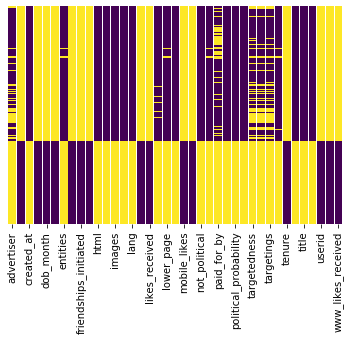

In [22]:
# to check missing values
sns.heatmap(fb_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
#Check correlation across all Facebook columns
facebook = fb_df2.corr()
facebook

,age,dob_day,dob_month,dob_year,friend_count,friendships_initiated,impressions,likes,likes_received,listbuilding_fundraising_proba,mobile_likes,mobile_likes_received,not_political,political,political_probability,targetedness,tenure,userid,www_likes,www_likes_received
age,1.000000,0.035035,0.025167,-1.000000,-0.027407,-0.058059,NaN,-0.013009,-0.022570,NaN,-0.026715,-0.024248,NaN,NaN,NaN,NaN,0.462742,-0.007265,0.015585,-0.018224
dob_day,0.035035,1.000000,0.129443,-0.035035,0.021961,0.022999,NaN,0.015980,0.001367,NaN,0.014541,0.000497,NaN,NaN,NaN,NaN,0.041855,-0.000839,0.009353,0.002460
dob_month,0.025167,0.129443,1.000000,-0.025167,0.019804,0.020075,NaN,0.014147,0.006495,NaN,0.010400,0.006435,NaN,NaN,NaN,NaN,0.029446,0.002924,0.012136,0.006003
dob_year,-1.000000,-0.035035,-0.025167,1.000000,0.027407,0.058059,NaN,0.013009,0.022570,NaN,0.026715,0.024248,NaN,NaN,NaN,NaN,-0.462742,0.007265,-0.015585,0.018224
friend_count,-0.027407,0.021961,0.019804,0.027407,1.000000,0.825850,NaN,0.298017,0.236463,NaN,0.235656,0.232701,NaN,NaN,NaN,NaN,0.166256,-0.001314,0.229803,0.220727
friendships_initiated,-0.058059,0.022999,0.020075,0.058059,0.825850,1.000000,NaN,0.285592,0.175131,NaN,0.229808,0.173804,NaN,NaN,NaN,NaN,0.133505,-0.001591,0.214022,0.161439
impressions,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.011552,NaN,NaN,0.008487,-0.004525,0.009100,-0.015223,NaN,NaN,NaN,NaN
likes,-0.013009,0.015980,0.014147,0.013009,0.298017,0.285592,NaN,1.000000,0.327376,NaN,0.871652,0.329258,NaN,NaN,NaN,NaN,0.057132,-0.002875,0.644960,0.295687
likes_received,-0.022570,0.001367,0.006495,0.022570,0.236463,0.175131,NaN,0.327376,1.000000,NaN,0.256998,0.973679,NaN,NaN,NaN,NaN,0.027745,0.001526,0.255365,0.947990
listbuilding_fundraising_proba,NaN,NaN,NaN,NaN,NaN,NaN,0.011552,NaN,NaN,1.000000,NaN,NaN,0.018845,-0.099580,0.050328,-0.205439,NaN,NaN,NaN,NaN


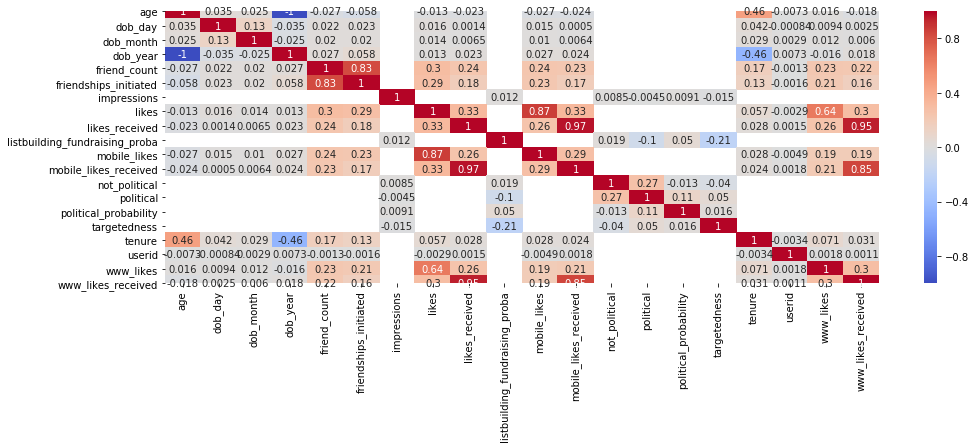

In [24]:
plt.figure(figsize = (16,5))
sns.heatmap(facebook, annot=True, cmap='coolwarm')

### Use 'clicks' and 'spent' to calculate the cost per click and per ad.

In [25]:
#Used 'clicks' and 'spent' to calculate the cost per click and per ad.

click_count_per_add = clicks_df.clicks.sum()/clicks_df.clicks.count()
click_ratio = (clicks_df.spent.sum()/63)/clicks_df.clicks.count()
ad_spend_count_ratio = (clicks_df.spent.sum()/63)/clicks_df.clicks.count()
print('Total number of Ads purcheased by IRA from 2015 to 2017: ', clicks_df.clicks.count())
print('Total dollar spent by IRA from 2015 to 2017: ${:.2f}'.format(clicks_df.spent.sum()/63))
print('Average cost per Ad: ${:.2f}'.format(ad_spend_count_ratio))
print('Average number of clicks per Ad: {:.2f}'.format(click_count_per_add))
print('Avg cost per click: ${:.2f}'.format(click_ratio))

Total number of Ads purcheased by IRA from 2015 to 2017:  1143
Total dollar spent by IRA from 2015 to 2017: $319.27
Average cost per Ad: $0.28
Average number of clicks per Ad: 11.63
Avg cost per click: $0.28


In [26]:
#Who boughtthe most political ads, which are represented as 'paid_for_by'?
fb_df2['paid_for_by'].value_counts()

International Rescue Committee                                              2944
INSLEE FOR AMERICA                                                          1904
Planned Parenthood Action Fund.                                             1781
Beto for Texas                                                              1558
Planned Parenthood Federation of America                                    1495
                                                                            ... 
UFCW Local 1000                                                                1
Committee to Restore Representation in West Seneca                             1
LPAC, not authorized by any candidate or candidate's committee.                1
Ruta Maria Jouniari, Democrat for Sarasota County Commission, District 2       1
Friends for Ginther                                                            1
Name: paid_for_by, Length: 8786, dtype: int64

In [27]:
#How do the political ads skew, which is measured by 'political_probability'?
fb_df2['political_probability'].value_counts()

0.997035    100
0.999966     76
1.000000     58
0.994729     58
0.998729     57
           ... 
0.999994      1
0.885738      1
0.999841      1
0.991699      1
0.999910      1
Name: political_probability, Length: 138951, dtype: int64

In [ ]:
#Organize by Political Ad spent
#titanic[["Sex", "Age"]].groupby("Sex").mean()

In [ ]:
#What is the political probability for each of the A and B class combinations?
    #titanic.groupby(["Sex", "Pclass"])["Fare"].mean()
#clicks_df.groupby(["","likes"])["political_probability"].mean()
'''fb_df2.groupby(['age']["likes"])["political_probability"].mean()''' 

In [ ]:
#Sort by Class in descending order
fb_df2.sort_values(by=['advertiser', 'likes'], ascending=False).head()

''''advertiser', 'age', 'created_at', 'dob_day', 'dob_month', 'dob_year',
       'entities', 'friend_count', 'friendships_initiated', 'gender', 'html',
       'id', 'images', 'impressions', 'lang', 'likes', 'likes_received',
       'listbuilding_fundraising_proba', 'lower_page', 'message',
       'mobile_likes', 'mobile_likes_received', 'not_political', 'page',
       'paid_for_by', 'political', 'political_probability', 'suppressed',
       'targetedness', 'targeting', 'targetings', 'targets', 'tenure',
       'thumbnail', 'title', 'updated_at', 'userid', 'www_likes',
       'www_likes_received'''

In [28]:
#Prepare a datafarame that is focused on message and 'paid_for_by' to review paid political ads activity
fe = ['title','message','paid_for_by']
text_fb = fb[fe]
text_fb.head(-10)

,title,message,paid_for_by
0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,League of Conservation Voters
1,Indivisible Guide,<p>The Mueller investigation is over. Special ...,Indivisible Project
2,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,International Rescue Committee
3,Covenant House International,<p>What more can you do in the final hours of ...,Covenant House International
4,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",Planned Parenthood Federation of America
...,...,...,...
162309,AFT - American Federation of Teachers,<p>Mike DeWine was elected as Ohio’s attorney ...,"AFT - American Federation of Teachers, not aut..."
162310,MoveOn,<p>We resisted and won control of the House! N...,"MoveOn.org Political Action, pol.moveon.org, n..."
162311,AAAS - The American Association for the Advanc...,"<p>Diversity in science, technology, and engin...",NaN
162312,Nathan Fletcher for County Supervisor 2018,"<p>As Supervisor, I will stand up to the polit...",Nathan Fletcher for Supervisor 2018


### Observation
We see that we have 162,314 records of political ad data on Facebook. The last ten sample how ads were purchased by nonpartisan groups, like "League of Conservation Voters", political organizer groups, like "Indivisible Project", unions "AFT", and international nonprofits like "International Rescue Committee". 


### Pickle Select Facebook Data

In [ ]:
## Pickle Facebook Data for Part 3 | Facebook data needed for NLP Analysis and Classification: text_fb
### Part 2 is Developing the Classifier Model
# text_fb.to_pickle('text_fb.pickle')

## Text Cleaning

In [ ]:
'''Remove punctuation and "weird stuff like --" .'''

import re

def text_cleaner(text_fb):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text_fb)
    text = re.sub("[\[].*?[\]]", "", text_fb)
    text = ' '.join(text_fb.split())
    return text

In [ ]:
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words con  taining numbers.'''
import re
import string

def clean_text_round1(text):
    text2 = text_fb.lower()
    text2 = re.sub('\[.*?\]', '', text_fb)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text_fb)
    text2 = re.sub('\w*\d\w*', '', text_fb)
    return text_fb

round1 = lambda x: clean_text_round1(x)

### Parse the Text

In [ ]:
# Parse the cleaned ads. This can take a bit.
nlp = spacy.load('en')
fb_ad_doc = nlp(text)  #doc = nlp("string")

#Iterate over tokens in a doc
for token in fb_ad_doc:
    print(token.text) #print (token.text)
    
    #Don't forget sentences_df

In [ ]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
fb_freq = word_frequencies(fb_ad_doc).most_common(10)

print('Message:', fb_freq)

### Pickle the data to use for later

In [ ]:
# Let's pickle it for later use
text_fb.to_pickle("corpus.pkl")

## Identify Stop Words

In [ ]:
stop =set(stopwords.words('english'))

def build_list(fb,col="title"):
    corpus=[]
    lem =WordNetLemmatizer()
    stop =set(stopwords.words('english'))
    new = fb[col].dropna().str.split()
    new =new.values.tolist()
    corpus =[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

## Semantic Analysis: Turning FB message into Vectors
We note the stop words and review counts of words from tf-idf.

In [ ]:
# Turning FB message into Vectors
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(fb_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #don't convert everything to lower case (since proper names are people who are targeted in disinfo campaigns)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


In [ ]:
#Applying the vectorizer
fb_message_tfidf =vectorizer.fit_transform(text_fb)
print("Number of features: %d" % fb_message_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(fb_message_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5]

In [ ]:
corpus=build_list(text_fb)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

In [ ]:
y =
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in title")

## Most Common 'Paid For By'

In [ ]:
corpus=build_list(text_fb,"paid_for_by")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("Most Common Word in 'paid_for_by'")

### Figure of 'Number of Top Ad Titles'
To highlight the ads that we would should review for fake versus true classifier to strenghten business case for impact.

In [ ]:
def plot_count(feature, title,fb, size=1, show_percents=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 4))
    total = float(len(fb))
    g = sns.countplot(fb[feature],order = fb[feature].value_counts().index[0:20], palette='Set3')
    g.set_title("Number of {}".format(title))
    if (size > 2):
        plt.xticks(rotation=90, size=10)
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                   height + 3, '{:1.2f}%'.format(100*height/total),
                   ha="center")
    ax.set_xticklabels(ax.get_xticklabels());
plt.show()

### *Title:"Number of Top Ad Titles"

In [ ]:

plot_count('title','Top Ad Titles', fb_df2, 3.5)
plt.title("Top Ad Titles")

### Observations:
Top 5 most common words are ranked:
    1) 'Committee'
    2)'International'
    3) 'Action' and 'Planned'
    4) 'Parenthood'
    
USA and 'America' are interchangeable--so maybe these are double-counting. 

'Democratic' not used as much as nonpolitical word of 'rescue'. However, we do not see 'Republican' or 'GOP'. 

'Beto' and'O'Rourke' are occuring at same rate. This is the only person to show up in this political ad data set. 

### Figure: Number of Most Popular Messages

In [ ]:
#Note the number (counts) of message.
#plot_count('message','message countplot', text_fb, 3.5)
plot_count('message','message countplot', fb_df2,3.5)

## Bag of Words
Defining functions to identify most common words and the create features from those words in the text. We need to create a df of the "corpus".

In [ ]:
#We need to use fb_text_df.
 ##Do we need to create features from Bag of Words and vectorize them for the Random Forest Classifier?
def bag_of_words(text):
    allwords = [token.lemma_
               for token in text
               if not token.is_punct
               and not token.is_stop]
    return [item[0] for item in Counter(allwords).most_common(2000)]
print()


In [ ]:
def bow_features(sentences, common_words):
    fb_text_df = pd.DataFrame(columns=common_words)
    fb_text_df['text_sentence'] = sentences[0]
    fb_text_df['text_source'] = sentences[1]
    fb_text_df.loc[:,common_words] = 0
    
    for i, sentence in enumerate(df['text_sentence']):
        words = [token.lemma_ 
                for token in sentence
                if (
                    not token.is_punct
                    and not token.is_stop
                    and token.lemma_ in common_words
                )]
        for word in words:
            fb_text_df.loc[i, word] += 1
        if i%100 == 0:
            print('Processing row {}'.format(i))
    return fb_text_d

In [ ]:
#data means fb_text_df
top_words_in_ads_dict = {}
for c in fb_text_df.columns:
    top = fb_text_df[c].sort_values(ascending=False).head(30)
    top_words_in_ads_dict[c]= list(zip(top.index, top.values))

top_words_in_ads_dict

## Frequency of Words 

In [ ]:
fb['message'].dtype

In [ ]:
#fb.message is a series, so it's a group of strings 
fb.message.iloc[1:10]

In [ ]:
temp_variable = "".join(fb.message.iloc[1:1000])

### Convert sentences into numeric vectors.
We need to transform sentences into NUMERIC vectors so that the vectors can be included in a Random Forest Classifier model, which cannot use string values. 

First we must create list.

In [ ]:
#List 

message_propoganda_list = []
for topic in [#Need to include topic_raw like physics_raw]:
    for sentence in topic['title','paid_for_by']['docs']: #What is docs?
        message_propoganda_list = message_propoganda_list + sentence['message']  #Used message_propaganda for abstract
        
  

In [ ]:
#Use spacy to count frequency of words

!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# All the processing work is done here, so it may take a while.
FB_political_doc = nlp(temp_variable)
#FB_popuarity_doc = nlp()

In [ ]:
# Cleaned Text before Identifying 'Stopwords'
from collections import Counter

# Utility function to calculate how frequently words appear in the data sets.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
political_freq = word_frequencies(temp_variable).most_common(10)
#like_freq = word_frequencies().most_common(10)
print('Political:', political_freq)
#print('Popular:', like_freq)

## Sentiment Analysis
Source: https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/3-Sentiment-Analysis.ipynb
Regarding text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to note with sentiment analysis.

TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
For more info on how TextBlob coded up its sentiment function.

In [ ]:
fb_df2.loc[0:5, 'message']

In [ ]:
TextBlob('The Mueller investigation is over').sentiment


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each message
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

fb_df2['polarity'] = fb_df2['message'].apply(pol)
fb_df2['subjectivity'] = fb_df2['title'].apply(sub)
fb_df2

In [ ]:
#Loop each 'message' value

for token in text
       